# <center> Stock Market vs House Price Index

In [30]:
#importing various libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
#downloading the data from yahoo finance
df_stock=yf.download(tickers='^FTAS',start='2005-01-01',end='2021-12-01',interval="1mo")

[*********************100%***********************]  1 of 1 completed


In [32]:
#checking the shape
df_stock.shape

(204, 6)

In [33]:
#checking the first 5 rows
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-01,2410.850098,2449.860107,2393.300049,2441.219971,2441.219971,0
2005-02-01,2441.270020,2543.479980,2441.270020,2495.459961,2495.459961,0
2005-03-01,2495.459961,2529.159912,2452.340088,2457.729980,2457.729980,0
2005-04-01,2457.729980,2504.800049,2385.709961,2397.050049,2397.050049,0
2005-05-01,2397.129883,2497.510010,2397.129883,2483.350098,2483.350098,0


In [34]:
#picking only adj close coloumn
df_stock = df_stock[['Adj Close']]
df_stock.head()

,Adj Close
Date,
2005-01-01,2441.219971
2005-02-01,2495.459961
2005-03-01,2457.729980
2005-04-01,2397.050049
2005-05-01,2483.350098


In [35]:
#adding column of percentage change
df_stock['12m_change'] = df_stock.pct_change(periods=12)
df_stock = df_stock.dropna()
df_stock.head()

,Adj Close,12m_change
Date,,
2006-01-01,2928.560059,0.199630
2006-02-01,2956.120117,0.184599
2006-03-01,3047.959961,0.240152
2006-04-01,3074.260010,0.282518
2006-05-01,2916.850098,0.174563


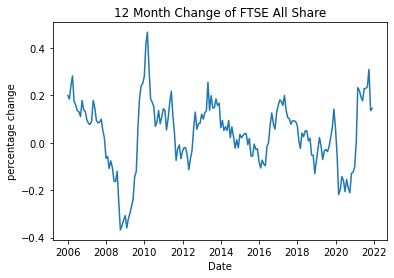

In [36]:
#plotting the percentage change
plt.plot(df_stock['12m_change'])
plt.title('12 Month Change of FTSE All Share')
plt.xlabel("Date")
plt.ylabel("percentage change")
plt.show()

In [37]:
#reseting index
df_stock.reset_index(inplace=True)

In [20]:
# importing the house price index data
df_hp = pd.read_excel("C:/Users/hp/dissertation/Datasets/UK-HPI-full-file-2022-05_land_registry_1.xlsx")
df_hp = df_hp[df_hp.RegionName=='United Kingdom']
df_hp.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
120732,1968-01-04,United Kingdom,K02000001,3594.602239,1.885299,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120733,1968-01-05,United Kingdom,K02000001,3594.602239,1.885299,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120734,1968-01-06,United Kingdom,K02000001,3594.602239,1.885299,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120735,1968-01-07,United Kingdom,K02000001,3716.453163,1.949207,NaN,3.389831,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120736,1968-01-08,United Kingdom,K02000001,3716.453163,1.949207,NaN,3.389831,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_hp['Date'] = pd.to_datetime(df_hp['Date'])

In [23]:
df_hp = df_hp[['Date','Index','12m%Change']]
df_hp.head()

,Date,Index,12m%Change
120732,1968-01-04,1.885299,NaN
120733,1968-01-05,1.885299,NaN
120734,1968-01-06,1.885299,NaN
120735,1968-01-07,1.949207,NaN
120736,1968-01-08,1.949207,NaN


In [24]:
df_grouped = df_hp.groupby(['Date']).mean()
df_grouped.head()

,Index,12m%Change
Date,,
1968-01-04,1.885299,NaN
1968-01-05,1.885299,NaN
1968-01-06,1.885299,NaN
1968-01-07,1.949207,NaN
1968-01-08,1.949207,NaN


In [25]:
#picking the date from start='2005-12-01',end='2021-12-01'
start='2005-12-01'
end='2021-12-01'
dates = (df_grouped.index > start) & (df_grouped.index <= end)
df_grouped = df_grouped[dates]
df_grouped.head()

,Index,12m%Change
Date,,
2006-01-01,83.901066,6.198306
2006-01-02,84.038116,6.474110
2006-01-03,84.719601,6.464102
2006-01-04,86.561110,7.253262
2006-01-05,87.381441,7.119575


In [26]:
#reseting the index
df_grouped.reset_index(inplace=True)

In [27]:
#changing the date format
# date in YYYY-MM-DD format
df_grouped['Date'] = df_grouped['Date'].dt.strftime('%Y-%d-%m')

In [38]:
df_grouped[['stock_price','12m_change_stock']]= df_stock[['Adj Close','12m_change']]

In [39]:
df_grouped.set_index('Date',inplace=True)
df_grouped.head()

,Index,12m%Change,stock_price,12m_change_stock
Date,,,,
2006-01-01,83.901066,6.198306,2928.560059,0.199630
2006-02-01,84.038116,6.474110,2956.120117,0.184599
2006-03-01,84.719601,6.464102,3047.959961,0.240152
2006-04-01,86.561110,7.253262,3074.260010,0.282518
2006-05-01,87.381441,7.119575,2916.850098,0.174563


### Checking relationship between 12 month percentage change

<AxesSubplot:title={'center':'Plotting 12m %change between HPI and FTSE Stock'}, xlabel='Date'>

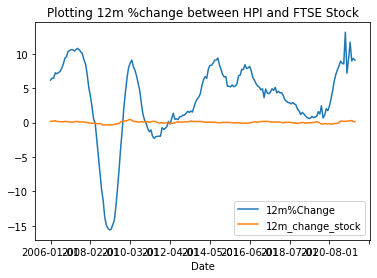

In [40]:
#plotting the percentage changes
df_grouped[['12m%Change','12m_change_stock']].plot(title='Plotting 12m %change between HPI and FTSE Stock')

In [41]:
#checking the correlation between HPI and stock
df_grouped[['12m%Change','12m_change_stock']].corr()

,12m%Change,12m_change_stock
12m%Change,1.000000,0.617493
12m_change_stock,0.617493,1.000000


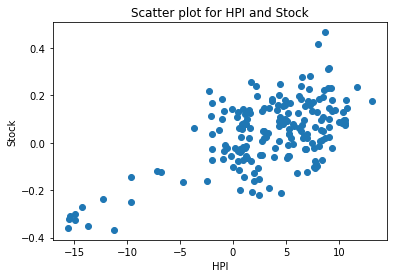

In [42]:
#plotting the scatter plot chart
plt.scatter(df_grouped['12m%Change'],df_grouped['12m_change_stock'])
plt.xlabel("HPI")
plt.ylabel('Stock')
plt.title('Scatter plot for HPI and Stock')
plt.show()

Text(0, 0.5, 'Stock')

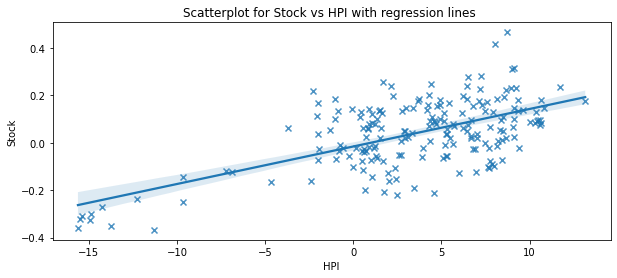

In [44]:
#using regression plot

plt.figure(figsize=(10,4))

# Scatterplot with regression lines
sns.regplot(x='12m%Change', y='12m_change_stock', data=df_grouped, 
            marker='x')

# Aesthetics
plt.title('Scatterplot for Stock vs HPI with regression lines ')
plt.xlabel('HPI')
plt.ylabel('Stock')

In [45]:
#Slope of regression line

slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped['12m%Change'],df_grouped['12m_change_stock'])

print('The slope of the regression line is: ','{:.2f}'.format(slope))

The slope of the regression line is:  0.02


#### Cross correlation Function

Cross correlation is a way to measure the degree of similarity between a time series and a lagged version of another time series.

This type of correlation is useful to calculate because it can tell us if the values of one time series are predictive of the future values of another time series. In other words, it can tell us if one time series is a leading indicator for another time series.

In [46]:
#calculate cross correlation
sm.tsa.stattools.ccf(df_grouped['12m_change_stock'],df_grouped['12m%Change'], adjusted=False)

array([ 6.17493316e-01,  5.83818174e-01,  5.31544366e-01,  4.66800264e-01,
        3.88704336e-01,  2.98058552e-01,  2.10260947e-01,  1.16801076e-01,
        2.71375896e-02, -5.80856811e-02, -1.42681440e-01, -2.16066267e-01,
       -2.79896186e-01, -3.33684875e-01, -3.78388228e-01, -4.16823836e-01,
       -4.41775220e-01, -4.60627231e-01, -4.70944136e-01, -4.74681779e-01,
       -4.71576786e-01, -4.57490203e-01, -4.38305702e-01, -4.10989522e-01,
       -3.77827420e-01, -3.36770681e-01, -2.88302261e-01, -2.34885922e-01,
       -1.81556258e-01, -1.29589204e-01, -7.81772773e-02, -2.58169044e-02,
        2.12862291e-02,  6.43921159e-02,  1.04382236e-01,  1.37157727e-01,
        1.64607285e-01,  1.82045496e-01,  1.88208553e-01,  1.87728185e-01,
        1.81272611e-01,  1.68521710e-01,  1.48876978e-01,  1.20939354e-01,
        8.77435188e-02,  4.72029639e-02,  4.94711775e-03, -3.72781171e-02,
       -8.01981758e-02, -1.18774881e-01, -1.54679913e-01, -1.84053968e-01,
       -2.05761418e-01, -

## Checking the relationship between the actual values

<AxesSubplot:title={'center':'Plotting HPI and FTSE Stock'}, xlabel='Date'>

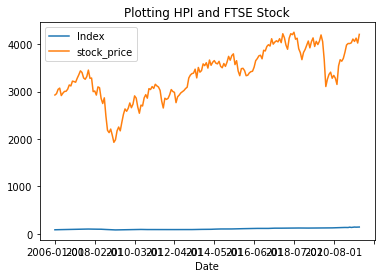

In [47]:
df_grouped[['Index','stock_price']].plot(title='Plotting HPI and FTSE Stock')

In [48]:
#checking the correlation between HPI and stock
df_grouped[['Index','stock_price']].corr()

,Index,stock_price
Index,1.000000,0.791837
stock_price,0.791837,1.000000


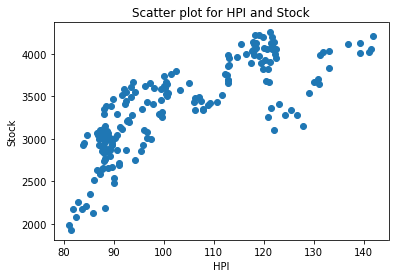

In [49]:
#plotting the scatter plot chart
plt.scatter(df_grouped['Index'],df_grouped['stock_price'])
plt.xlabel("HPI")
plt.ylabel('Stock')
plt.title('Scatter plot for HPI and Stock')
plt.show()

In [50]:

#calculate cross correlation
sm.tsa.stattools.ccf(df_grouped['stock_price'],df_grouped['Index'], adjusted=False)

array([ 0.79183722,  0.77083861,  0.74962364,  0.72933451,  0.70640946,
        0.68231664,  0.66015997,  0.63402567,  0.61154975,  0.58969166,
        0.56715959,  0.54561373,  0.5255183 ,  0.50540657,  0.48683798,
        0.47064799,  0.45705734,  0.44578838,  0.4347354 ,  0.42397655,
        0.41417178,  0.40656508,  0.40049932,  0.39368132,  0.38742164,
        0.37760429,  0.36942906,  0.36127572,  0.35590226,  0.35010396,
        0.34124488,  0.33235204,  0.32460879,  0.31145261,  0.29490783,
        0.27665756,  0.25923575,  0.238308  ,  0.21501383,  0.19227209,
        0.17149012,  0.15052943,  0.12745641,  0.10637051,  0.08660053,
        0.06736751,  0.0480608 ,  0.02873494,  0.01112546, -0.0079688 ,
       -0.02508637, -0.03904246, -0.05277152, -0.0683515 , -0.08524061,
       -0.09911727, -0.11223256, -0.12269098, -0.13160455, -0.14155402,
       -0.14841764, -0.1556659 , -0.16164299, -0.16778256, -0.17294349,
       -0.17853151, -0.18487867, -0.19156917, -0.20070551, -0.21

Notice that the correlation between the two time series becomes less and less positive as the number of lags increases. This tells us that Stock Market price during a given month is quite predictive of house price index

Text(0, 0.5, 'Stock')

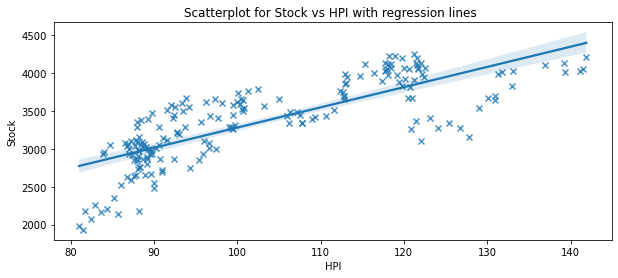

In [52]:
#using regression plot

plt.figure(figsize=(10,4))

# Scatterplot with regression lines
sns.regplot(x='Index', y='stock_price', data=df_grouped, 
            marker='x')

# Aesthetics
plt.title('Scatterplot for Stock vs HPI with regression lines ')
plt.xlabel('HPI')
plt.ylabel('Stock')

In [53]:
#Slope of regression line

slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped['Index'],df_grouped['stock_price'])

print('The slope of the regression line is: ','{:.2f}'.format(slope))

The slope of the regression line is:  26.70


### We can see that Stock market has a positive impact on the House Price Index